# <center><font color= blue>Homework 01 - Due Feb 14 </font></center>
## <font color= blue>CPSC8430 - Deep Learning </font>
##  <font color= blue>Sadegh Sadeghi Tabas</font> 
###  <font color= red>Implementation of DNNs for a non-linear single input-output function</font> 
***

### Part 1: Deep vs Shallow

__a)__ Simulate a non-linnear function with single input and output.
In this homework, first I chose a non-linear function with single input and output. Then the selected function trained with three different DNNs with 500 data points.

First we are going to train three different models with same number of parameters (3607). The models training process will stops once the  number of epochs reaches the predifined value (500 epochs).


In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


#### <font color= green> import required libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from math import sin, cos, pi

In [3]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


#### <font color= green> Please check out the libraries veirsion that are compatible with this code

In [4]:
print("trnsorflow version=",tf.__version__)
print("numpy version=",np.__version__)

trnsorflow version= 1.15.2
numpy version= 1.19.5


####  <font color= green> Here we are going to set random seed to have reproducible results

In [5]:
tf.set_random_seed(1)
np.random.seed(1)

####  <font color= green> Data prepration: in this step I'm going to generate and plot x and y datasets based on nonlinear functions I selected.

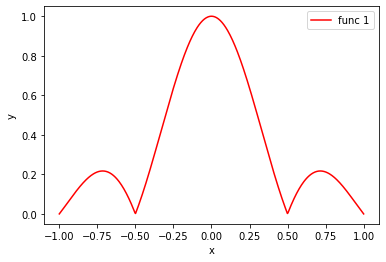

In [6]:
numSamples = 500
x = np.linspace(-1, 1, numSamples)[:, np.newaxis]    # shape (numSamples, 1)
y = np.abs((np.sin(2 * x * np.pi))/(2 * x * np.pi))
#y2 = (np.cos(x * np.pi))

plt.plot(x,y,'r', label = 'func 1')
#plt.plot(x,y2, 'b', label = 'func 2')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

#### <font color= green> Function to count the number of parameters in each model

In [7]:
def parametersNum():
    NumPar = 0
    for var in tf.trainable_variables():
        shape = var.get_shape()
        varParameter = 1
        for dim in shape:
            varParameter *= dim.value
            NumPar += varParameter
    return(NumPar)

#### <font color= green> Now we are going to create __Place Holders__ for input and output of each model

In [8]:
# Model 1 
x_m1 = tf.placeholder(tf.float32, [None, 1])
y_m1 = tf.placeholder(tf.float32, [None, 1])

# Model 2
x_m2 = tf.placeholder(tf.float32, [None, 1])
y_m2 = tf.placeholder(tf.float32, [None, 1])

# Model 3
x_m3 = tf.placeholder(tf.float32, [None, 1])
y_m3 = tf.placeholder(tf.float32, [None, 1])

# Keep probability 
keep_prob = tf.placeholder(tf.float32)

### <font color= blue> In the steps below we want to define different models and their relevant layers

### <font color= red> Define Model 1

#### <font color= green> Defining Model layers

In [9]:
h1_m1 = tf.layers.dense(x_m1, units=150, activation=tf.nn.relu, name='h1_m1')
dropout_h1_m1 = tf.layers.dropout(h1_m1, 0.5)

h2_m1 = tf.layers.dense(dropout_h1_m1, units=20, activation=tf.nn.relu, name='h2_m1')
dropout_h2_m1 = tf.layers.dropout(h2_m1, 0.5)

h3_m1 = tf.layers.dense(dropout_h2_m1, units=5, activation=tf.nn.relu, name='h3_m1')

out_m1 = tf.layers.dense(h3_m1, units=1, name='out_m1')

params_m1 = parametersNum()
print("Number of parameters of Model 1:" , params_m1)

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.dropout instead.
Number of parameters of Model 1: 3607


#### <font color= green> Defining Model Loss Method

In [10]:
loss_m1 = tf.losses.mean_squared_error(y_m1, out_m1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


#### <font color= green> Defining Model Optimization Method

In [11]:
GDO_m1 = tf.train.GradientDescentOptimizer(learning_rate=0.01)
grads_m1 = GDO_m1.compute_gradients(loss_m1)
opt_m1 = GDO_m1.apply_gradients(grads_m1)

#### <font color= green> Getting Weights Func

In [12]:
def get_weights(layer_name):
    with tf.variable_scope(layer_name, reuse=True):
        variable = tf.get_variable('kernel')
    return variable

#### <font color= green> Getting Weights

In [13]:
weights_m1_fc1 = get_weights(layer_name='h1_m1')
weights_m1_fc2 = get_weights(layer_name='h2_m1')
weights_m1_fc3 = get_weights(layer_name='h3_m1')
weights_m1_fc4 = get_weights(layer_name='out_m1')

print(weights_m1_fc1)
print(weights_m1_fc2)
print(weights_m1_fc3)
print(weights_m1_fc4)

<tf.Variable 'h1_m1/kernel:0' shape=(1, 150) dtype=float32_ref>
<tf.Variable 'h2_m1/kernel:0' shape=(150, 20) dtype=float32_ref>
<tf.Variable 'h3_m1/kernel:0' shape=(20, 5) dtype=float32_ref>
<tf.Variable 'out_m1/kernel:0' shape=(5, 1) dtype=float32_ref>


### <font color= red> Define Model 2

#### <font color= green> Defining Model layers

In [14]:
h1_m2 = tf.layers.dense(x_m2, units=15, activation=tf.nn.relu, name='h1_m2')

h2_m2 = tf.layers.dense(h1_m2, units=20, activation=tf.nn.relu, name='h2_m2')
dropout_h2_m2 = tf.layers.dropout(h2_m2, 0.5)

h3_m2 = tf.layers.dense(dropout_h2_m2, units=25, activation=tf.nn.relu, name='h3_m2')
dropout_h3_m2 = tf.layers.dropout(h3_m2, 0.5)

h4_m2 = tf.layers.dense(dropout_h3_m2, units=40, activation=tf.nn.relu, name='h4_m2')
dropout_h4_m2 = tf.layers.dropout(h4_m2, 0.5)

h5_m2 = tf.layers.dense(dropout_h4_m2, units=29, activation=tf.nn.relu, name='h5_m2')

h6_m2 = tf.layers.dense(h5_m2, units=10, activation=tf.nn.relu, name='h6_m2')

h7_m2 = tf.layers.dense(h6_m2, units=4, activation=tf.nn.relu, name='h7_m2')

h8_m2 = tf.layers.dense(h7_m2, units=2, activation=tf.nn.relu, name='h8_m2')

out_m2 = tf.layers.dense(h8_m2, units=1, name='out_m2')

params_m2 = parametersNum() - params_m1
print(params_m2)

3607


#### <font color= green> Defining Model Loss Method

In [15]:
loss_m2 = tf.losses.mean_squared_error(y_m2, out_m2)

#### <font color= green> Defining Model Optimization Method

In [16]:
GDO_m2 = tf.train.GradientDescentOptimizer(learning_rate=0.055)
opt_m2 = GDO_m2.minimize(loss_m2)

### <font color= red> Define Model 3

#### <font color= green> Defining Model layers

In [17]:
h1_m3 = tf.layers.dense(x_m3, units=50, activation=tf.nn.relu, name='h1_m3')
dropout_h1_m3 = tf.layers.dropout(h1_m3, 0.5)

h2_m3 = tf.layers.dense(dropout_h1_m3, units=45, activation=tf.nn.relu, name='h2_m3')

h3_m3 = tf.layers.dense(h2_m3, units=15, activation=tf.nn.relu, name='h3_m3')

h4_m3 = tf.layers.dense(h3_m3, units=12, activation=tf.nn.relu, name='h4_m3')
dropout_h4_m3 = tf.layers.dropout(h4_m3, 0.5)

h5_m3 = tf.layers.dense(dropout_h4_m3, units=10, activation=tf.nn.relu, name='h5_m3')

h6_m3 = tf.layers.dense(h5_m3, units=5, activation=tf.nn.relu, name='h6_m3')

out_m3 = tf.layers.dense(h6_m3, units=1, name='out_m3')


params_m3 = parametersNum() - params_m1 - params_m2
print(params_m3)

3606


#### <font color= green> Defining Model Loss Method

In [18]:
loss_m3 = tf.losses.mean_squared_error(y_m3, out_m3)

#### <font color= green> Defining Model Optimization Method

In [19]:
GDO_m3 = tf.train.GradientDescentOptimizer(learning_rate=0.0004)
opt_m3 = GDO_m3.minimize(loss_m3)

### <font color= blue> In the steps below we want to train different models and compute XXX for the model 1

#### <font color= green> Begining TensorFlow Session


In [20]:
sess = tf.Session()

#### <font color= green>Initializing variables

In [21]:
sess.run(tf.global_variables_initializer())

#### <font color= green> Getting Gradients

In [22]:
grads = tf.gradients(loss_m1, weights_m1_fc4)[0]
print(grads)

Tensor("gradients_3/out_m1/MatMul_grad/MatMul_1:0", shape=(5, 1), dtype=float32)


#### <font color= green> Function to calculate grad norm

In [23]:
def calcGradNorm(gradsValues):
    grad_all = 0.0
    for gv in gradsValues:
        grad_all += sum(gv**2)
    
    grad_norm = grad_all ** 0.5
    return grad_norm

#### <font color= green> Computing Hessian

In [24]:
hessian = tf.reduce_sum(tf.hessians(loss_m1, weights_m1_fc4)[0], axis = 2)
print(hessian)

Tensor("Sum:0", shape=(5, 1, 1), dtype=float32)


### <font color= blue> Models Training

In [25]:
epoch_arr, loss_arr_m1, loss_arr_m2, loss_arr_m3 = [], [], [], [] 
max_epochs = 500

### <font color= red> Train Model 1

#### <font color= green> Initialization

In [26]:
epoch_m1 = 0
iteration_ctr = 0
epoch_arr_m1, grad_arr_m1, iteration_arr, loss_itr_arr = [], [], [], []
m1_convergence = False
n = 5 # every n steps we calculate the gradients and hessian 

In [27]:
while not m1_convergence:
    epoch_m1 +=1
    
    # Train the model    
    for i in range(numSamples): 
        _, l_m1, pred_m1 = sess.run([opt_m1, loss_m1, out_m1], feed_dict={x_m1: x, y_m1: y, keep_prob: 0.5})

    # Calculating gradients and hessian
        if i % n == 0:
            global iteration_ctr
            iteration_ctr +=1
            iteration_arr.append(iteration_ctr)
      
            grads_values, hess_values = sess.run([grads, hessian], feed_dict={x_m1: x, y_m1: y})

            # Calculate gradient norm
            grad_arr_m1.append(calcGradNorm(grads_values))
            
            # Calculate loss
            loss_itr_arr.append(l_m1)
  
    # Store epoch and loss
    epoch_arr_m1.append(epoch_m1)
    loss_arr_m1.append(l_m1)

    # Print epoch and loss 
    if epoch_m1 % 50 == 0:
        print('Epoch: {}/{},  Loss Model 1: {}'.format(epoch_m1, max_epochs, l_m1))

    # Convergence conditions
    if epoch_m1 >= max_epochs:
        m1_convergence = True
        print('Model Coverged: Max epochs reached')

    if (epoch_m1 > 10) and (loss_arr_m1[-1] < 0.001):
        if (abs(loss_arr_m1[-1] - loss_arr_m1[-2]) < 1.0e-05) and (abs(loss_arr_m1[-2] - loss_arr_m1[-3]) < 1.0e-05):
            m1_convergence = True
            print('Model Converged: Loss difference in the last three epochs is less than 1.0e-05')

print('\nModel Training completed\n')
print('Epoch: {}/{},  Loss Model 1: {}'.format(epoch_m1, max_epochs, l_m1))

Epoch: 50/500,  Loss Model 1: 0.0022822588216513395
Epoch: 100/500,  Loss Model 1: 0.0014464627020061016
Epoch: 150/500,  Loss Model 1: 0.0003302130207885057
Model Converged: Loss difference in the last three epochs is less than 1.0e-05

Model Training completed

Epoch: 157/500,  Loss Model 1: 0.00025482484488748014


### <font color= red> Train Model 2

In [28]:
epoch_m2 = 0
epoch_arr_m2 = []
m2_convergence = False

In [29]:
while not m2_convergence:
    epoch_m2 +=1
    
    # Train the model
    for i in range(numSamples):
        _, l_m2, pred_m2 = sess.run([opt_m2, loss_m2, out_m2], feed_dict={x_m2: x, y_m2: y, keep_prob: 0.5})
  
    # Store epoch and loss
    epoch_arr_m2.append(epoch_m2)
    loss_arr_m2.append(l_m2)

    # Print epoch and loss 
    if epoch_m2 % 50 == 0:
        print('Epoch: {}/{},  Loss Model 2: {}'.format(epoch_m2, max_epochs, l_m2))

    # Convergence conditions
    if epoch_m2 >= max_epochs:
        m2_convergence = True
        print('Model Coverged: Max epochs reached')

    if (epoch_m2 > 5) and (loss_arr_m2[-1] < 0.001):
        if (abs(loss_arr_m2[-1] - loss_arr_m2[-2]) < 1.0e-05) and (abs(loss_arr_m2[-2] - loss_arr_m2[-3]) < 1.0e-05):
            m2_convergence = True
            print('Model Converged: Loss difference in the last three epochs is less than 1.0e-05')

print('\nModel Training completed\n')
print('Epoch: {}/{},  Loss Model 2: {}'.format(epoch_m2, max_epochs, l_m2))

Model Converged: Loss difference in the last three epochs is less than 1.0e-05

Model Training completed

Epoch: 33/500,  Loss Model 2: 0.000138845804031007


### <font color= red> Train Model 3

In [30]:
epoch_m3 = 0
epoch_arr_m3 = []

m3_convergence = False

In [31]:

while not m3_convergence:
    epoch_m3 +=1
    
    # Train the model
    for i in range(numSamples):
        _, l_m3, pred_m3 = sess.run([opt_m3, loss_m3, out_m3], feed_dict={x_m3: x, y_m3: y, keep_prob: 0.5})
  
    # Store epoch and loss
    epoch_arr_m3.append(epoch_m3)
    loss_arr_m3.append(l_m3)

    # Print epoch and loss 
    if epoch_m3 % 50 == 0:
        print('Epoch: {}/{},  Loss Model 3: {}'.format(epoch_m3, max_epochs, l_m3))

    # Convergence conditions
    if epoch_m3 >= max_epochs:
        m3_convergence = True
        print('Model Coverged: Max epochs reached')

    if (epoch_m3 > 5) and (loss_arr_m3[-1] < 0.001):
        if (abs(loss_arr_m3[-1] - loss_arr_m3[-2]) < 1.0e-05) and (abs(loss_arr_m3[-2] - loss_arr_m3[-3]) < 1.0e-05):
            m3_convergence = True
            print('Model Converged: Loss difference in the last three epochs is less than 1.0e-05')

print('\nModel Training completed\n')
print('Epoch: {}/{},  Loss Model 3: {}'.format(epoch_m3, max_epochs, l_m3))

Epoch: 50/500,  Loss Model 3: 0.0039000255055725574
Epoch: 100/500,  Loss Model 3: 0.003282777266576886
Epoch: 150/500,  Loss Model 3: 0.003043434349820018
Epoch: 200/500,  Loss Model 3: 0.00288894260302186
Epoch: 250/500,  Loss Model 3: 0.0027821576222777367
Epoch: 300/500,  Loss Model 3: 0.002707097679376602
Epoch: 350/500,  Loss Model 3: 0.0026502739638090134
Epoch: 400/500,  Loss Model 3: 0.0026033667381852865
Epoch: 450/500,  Loss Model 3: 0.0025628942530602217
Epoch: 500/500,  Loss Model 3: 0.002526496537029743
Model Coverged: Max epochs reached

Model Training completed

Epoch: 500/500,  Loss Model 3: 0.002526496537029743


### <font color= blue> Getting Results

### <font color= red> Training Losses vs Epochs Plot

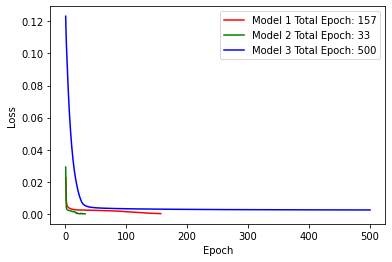

In [32]:
plt.cla()
plt.plot(epoch_arr_m1, loss_arr_m1, 'r', label="Model 1 Total Epoch: {}".format(epoch_m1))
plt.plot(epoch_arr_m2, loss_arr_m2, 'g', label="Model 2 Total Epoch: {}".format(epoch_m2))
plt.plot(epoch_arr_m3, loss_arr_m3, 'b', label="Model 3 Total Epoch: {}".format(epoch_m3))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### <font color= red> Models Prediction and Ground-Truth Plot

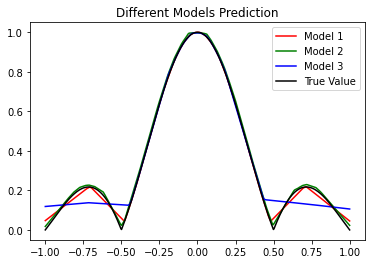

In [33]:
plt.plot(x, pred_m1, 'r', label='Model 1')
plt.plot(x, pred_m2, 'g', label='Model 2')
plt.plot(x, pred_m3, 'b', Label='Model 3')
plt.plot(x,y, 'black', label='True Value')
plt.title('Different Models Prediction')
plt.legend()
plt.show()

### <font color= red> Gradient Norm and Loss vs Iteration

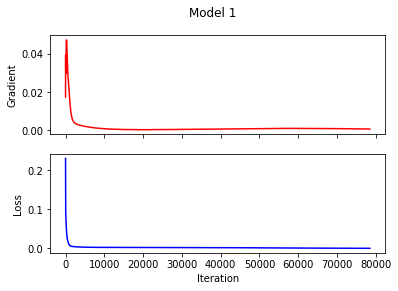

In [34]:
iteration_arr = np.array(iteration_arr) * n
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Model 1')
ax1.plot(iteration_arr, grad_arr_m1, 'r')
ax2.plot(iteration_arr, loss_itr_arr, 'b')
plt.xlabel('Iteration')
ax1.set_ylabel('Gradient')
ax2.set_ylabel('Loss')
plt.show()